In [6]:
import pandas as pd
import zipfile

# Open the zip file directly
with zipfile.ZipFile("metadata.csv.zip") as z:
    # List contents inside the zip
    print("Files inside zip:", z.namelist())
    
    # Open the CSV inside the zip
    with z.open("metadata.csv") as f:
        df = pd.read_csv(f, low_memory=False)

# Create a smaller sample
df.sample(1000, random_state=42).to_csv("metadata_sample.csv", index=False)
print("✅ Sample saved as metadata_sample.csv")


Files inside zip: ['metadata.csv']
✅ Sample saved as metadata_sample.csv


In [7]:
# PART 1: DATA LOADING & EXPLORATION
import pandas as pd

# Load the smaller sample dataset
df = pd.read_csv("metadata_sample.csv")

# Preview the data
print("Shape of dataset:", df.shape)
display(df.head(3))

# Get info about data types and missing values
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum().sort_values(ascending=False).head(10))


Shape of dataset: (1000, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ak20jg32,42a61efa32fae8fb14d1c8c1a8bc528c59e1583a,PMC,Development and Internal Validation of a Novel...,10.3389/fpsyt.2021.593710,PMC8172985,34093252.0,cc-by,Objective: The aim of our study was to identif...,2021-05-20,"Zhou, Jingjing; Zhou, Jia; Sun, Zuoli; Feng, L...",Front Psychiatry,NaN,NaN,NaN,document_parses/pdf_json/42a61efa32fae8fb14d1c...,document_parses/pmc_json/PMC8172985.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8...,NaN
1,d27cnei3,NaN,PMC; WHO,mRNA-1273: Acute disseminated encephalomyeliti...,10.1007/s40278-021-06200-0,PMC8617002,NaN,no-cc,NaN,2021-11-27,NaN,Reactions Weekly,NaN,NaN,NaN,NaN,document_parses/pmc_json/PMC8617002.xml.json,https://doi.org/10.1007/s40278-021-06200-0,244637117.0
2,7fo988o7,NaN,WHO,The Joint Commission should reconsider its pos...,NaN,NaN,NaN,unk,NaN,2020,"Kroll, David S; Shah, Sejal B; Gorman, Janet M",Gen. hosp. psychiatr,NaN,#1074753,NaN,NaN,NaN,NaN,227251863.0



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          1000 non-null   object 
 1   sha               370 non-null    object 
 2   source_x          1000 non-null   object 
 3   title             1000 non-null   object 
 4   doi               629 non-null    object 
 5   pmcid             376 non-null    object 
 6   pubmed_id         486 non-null    float64
 7   license           1000 non-null   object 
 8   abstract          768 non-null    object 
 9   publish_time      998 non-null    object 
 10  authors           985 non-null    object 
 11  journal           920 non-null    object 
 12  mag_id            0 non-null      float64
 13  who_covidence_id  445 non-null    object 
 14  arxiv_id          18 non-null     float64
 15  pdf_json_files    370 non-null    object 
 16  pmc_json_files    322

In [8]:
# PART 2: DATA CLEANING AND PREPARATION

# Convert publish_time to datetime (ignore errors if format varies)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract publication year
df['year'] = df['publish_time'].dt.year

# Drop rows where year or title is missing
df_clean = df.dropna(subset=['year', 'title'])

# Fill missing abstracts or journal names with placeholder text
df_clean['abstract'] = df_clean['abstract'].fillna("No abstract available")
df_clean['journal'] = df_clean['journal'].fillna("Unknown Journal")

# Show summary after cleaning
print("Shape after cleaning:", df_clean.shape)
print("\nSample cleaned data:")
display(df_clean[['title', 'journal', 'year']].head(5))


Shape after cleaning: (502, 20)

Sample cleaned data:


C:\Users\USER\AppData\Local\Temp\ipykernel_2052\1293208102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['abstract'] = df_clean['abstract'].fillna("No abstract available")
C:\Users\USER\AppData\Local\Temp\ipykernel_2052\1293208102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['journal'] = df_clean['journal'].fillna("Unknown Journal")


,title,journal,year
0,Development and Internal Validation of a Novel...,Front Psychiatry,2021.0
1,mRNA-1273: Acute disseminated encephalomyeliti...,Reactions Weekly,2021.0
3,Flattening the Curve of Prostate Cancer Progre...,"International journal of radiation oncology, b...",2020.0
4,Vincristine: Various toxicities: case report,Unknown Journal,2016.0
5,Single domain shark VNAR antibodies neutralize...,bioRxiv,2021.0


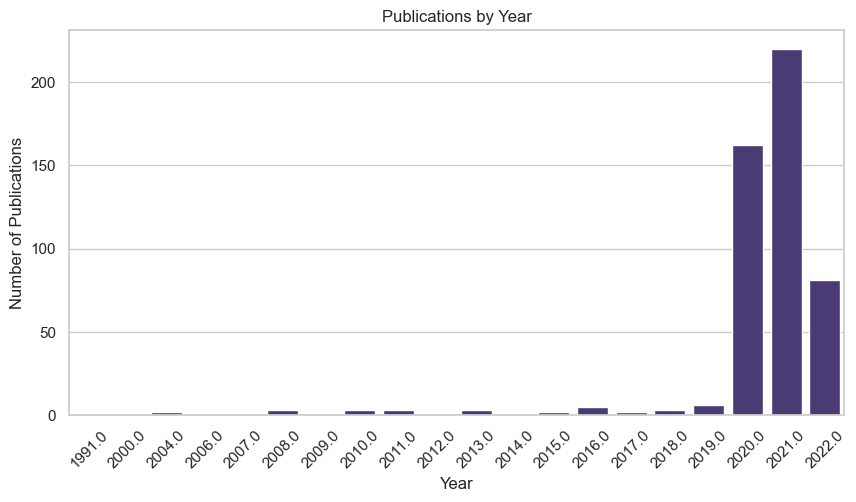

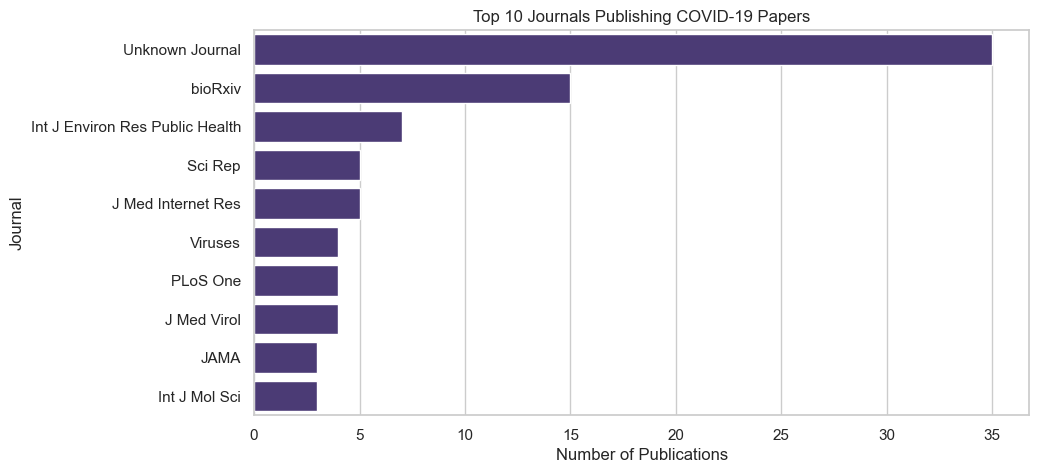

In [9]:
# PART 3: DATA VISUALIZATION

import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid", palette="viridis")

# --- 1️⃣ Publications by Year ---
year_counts = df_clean['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Publications by Year')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45)
plt.show()

# --- 2️⃣ Top 10 Journals ---
top_journals = df_clean['journal'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title('Top 10 Journals Publishing COVID-19 Papers')
plt.xlabel('Number of Publications')
plt.ylabel('Journal')
plt.show()
